### Pizza Price Prediction Model

Dataset used: Kaggle pizza dataset

Contributed by Sayak Bhattacharya 

Github [diffrxction](https://github.com/diffrxction) 
### Change this at the end

# Objective
Create a machine learning model using linear regression or decision tree or random forest and Kaggle Pizza dataset to predict the price of Pizza with various toppings and other added factors

# ML Overview

Machine learning is a branch of artificial intelligence that enables computers to learn and adapt similar to how humans learn. It is the ability of a machine to detect patterns in data and learn from it so as to be able to take action accordingly. Machine learning algorithms are trained on datasets so they can make ‘informed’ decisions based on the information they have learned. This project covers an overview of what machine learning is, its types and examples of use cases for businesses.

In this project we will use supervised learning (a branch of machine learning where we teach our model with well-labelled data).
We will start with a simple Linear Regressesion model and predict the target variable, and then move forward with the comparison between other similar models.

## Project Pipeline

* Cleaning our data and making it suitable for our ML model.
* Data exploration and analysis to study our dataset.
* Creating a simple model using linear regression.
* Using the model to carryout prediction and evaluating it's efficiency.

# Requirements

Import the mentioned libraries:

- Numpy

- Pandas

- Sklearn

- matplotlib.plt

- Seaborn

Import Kaggle Pizza dataset from the provided csv file using pandas

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
 # This statement provides with the automatic plt.show() function with each matplotlib line
%matplotlib inline

### Data Loading

In [3]:
pizza = pd.read_csv('pizza_v2.csv')

In [4]:
pizza

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes


### Data Exploration

### Assigned Tasks

1. Use functions `head()` and `tail()` to see first and last five rows of the created dataframe.

2. Use `describe()` to get even further insights on the created data frame.

3. Use python functions to remove the "Rp" before the price of the Pizza in the price_rupiah column and "inch" from the end of diameter column

4. Use `df.dtype` or `df.info` to know data type various features present in the dataset. If we find categorical data, then we'll require to use different encoding methods.

5. Use `df.isnull().sum()` to check for missing values in each column. If we find missing values, then either we will place values there or we can drop the row or column.

6. Create a heatmap using seaborn to find corelation between different features and labels. In model creation we will be using features having a high corelation with our target label.

7. Create KDE plot of different variables using seaborn library.

In [5]:
pizza.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [6]:
pizza.tail()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes
128,E,"Rp78,000",12 inch,meat,BBQ_meat_fiesta,medium,no,no,yes


In [7]:
pizza.describe()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
count,129,129,129,129,129,129,129,129,129
unique,5,43,12,12,20,6,2,2,2
top,C,"Rp72,000",12 inch,chicken,classic,medium,yes,yes,yes
freq,30,11,49,29,30,41,76,86,72


In [8]:
pizza['price_rupiah'].head()

0    Rp235,000
1    Rp198,000
2    Rp120,000
3    Rp155,000
4    Rp248,000
Name: price_rupiah, dtype: object

### Utility function for filtering the `price_rupiah` column

In [9]:
def remove_Rp(price):
    for char in price:
        if char in "Rp,":
            price = price.replace(char,'')
    return price

In [10]:
check = remove_Rp(pizza['price_rupiah'][0])
check

'235000'

In [11]:
price = pizza['price_rupiah'].apply(remove_Rp)

In [12]:
price = price.astype('float64')

In [13]:
pizza['Pizza_price'] = price
pizza.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,Pizza_price
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no,235000.0
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no,198000.0
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes,120000.0
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes,155000.0
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes,248000.0


In [14]:
pizza.drop(['company', 'price_rupiah'], axis=1, inplace=True)

### Utility function for filtering the `diameter` column

In [15]:
def remove_inch(size):
    for char in size:
        if char in " inch":
            size = size.replace(char,'')
    return size

In [16]:
diameter = pizza['diameter'].apply(remove_inch)

In [17]:
diameter = diameter.astype('float64')

In [18]:
pizza['diameter'] = diameter

In [19]:
pizza

,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,Pizza_price
0,22.0,chicken,double_signature,jumbo,yes,yes,no,235000.0
1,20.0,papperoni,double_signature,jumbo,yes,yes,no,198000.0
2,16.0,mushrooms,double_signature,reguler,yes,yes,yes,120000.0
3,14.0,smoked_beef,double_signature,reguler,yes,no,yes,155000.0
4,18.0,mozzarella,double_signature,jumbo,yes,no,yes,248000.0
...,...,...,...,...,...,...,...,...
124,8.5,tuna,spicy tuna,small,yes,yes,yes,39000.0
125,12.0,tuna,spicy tuna,medium,yes,yes,yes,72000.0
126,14.0,tuna,spicy tuna,large,yes,yes,yes,99000.0
127,8.5,meat,BBQ_meat_fiesta,small,yes,no,yes,44000.0


In [20]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   diameter         129 non-null    float64
 1   topping          129 non-null    object 
 2   variant          129 non-null    object 
 3   size             129 non-null    object 
 4   extra_sauce      129 non-null    object 
 5   extra_cheese     129 non-null    object 
 6   extra_mushrooms  129 non-null    object 
 7   Pizza_price      129 non-null    float64
dtypes: float64(2), object(6)
memory usage: 8.2+ KB


### Converting the categorical columns `extra_sauce`, `extra_cheese` and `extra_mushrooms` to numerical columns

In [21]:
pizza['extra_sauce'] = pizza['extra_sauce'].apply(lambda x : 1 if x=='yes' else 0)
pizza['extra_cheese'] = pizza['extra_cheese'].apply(lambda x : 1 if x=='yes' else 0)
pizza['extra_mushrooms'] = pizza['extra_mushrooms'].apply(lambda x : 1 if x=='yes' else 0)

In [22]:
pizza

,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,Pizza_price
0,22.0,chicken,double_signature,jumbo,1,1,0,235000.0
1,20.0,papperoni,double_signature,jumbo,1,1,0,198000.0
2,16.0,mushrooms,double_signature,reguler,1,1,1,120000.0
3,14.0,smoked_beef,double_signature,reguler,1,0,1,155000.0
4,18.0,mozzarella,double_signature,jumbo,1,0,1,248000.0
...,...,...,...,...,...,...,...,...
124,8.5,tuna,spicy tuna,small,1,1,1,39000.0
125,12.0,tuna,spicy tuna,medium,1,1,1,72000.0
126,14.0,tuna,spicy tuna,large,1,1,1,99000.0
127,8.5,meat,BBQ_meat_fiesta,small,1,0,1,44000.0


### One-Hot encoding the columns `topping`, `variant` and `size`

In [23]:
pizza['size'].unique()

array(['jumbo', 'reguler', 'small', 'medium', 'large', 'XL'], dtype=object)

In [24]:
pizza['topping'].value_counts()

chicken         29
mushrooms       22
mozzarella      21
smoked_beef     19
tuna             9
vegetables       9
meat             8
sausage          3
black_papper     3
beef             3
papperoni        2
onion            1
Name: topping, dtype: int64

In [25]:
pizza['variant'].value_counts()

classic              30
double_mix           10
crunchy              10
meat_lovers          10
new_york             10
double_decker         9
american_favorite     5
double_signature      5
BBQ_meat_fiesta       5
super_supreme         5
neptune_tuna          3
extravaganza          3
italian_veggie        3
gournet_greek         3
american_classic      3
spicy_tuna            3
BBQ_sausage           3
meat_eater            3
thai_veggie           3
spicy tuna            3
Name: variant, dtype: int64

In [26]:
# One hot encoding the respective columns


one_hot_encoded_data = pd.get_dummies(pizza, columns = ['topping', 'variant', 'size'])
one_hot_encoded_data

,diameter,extra_sauce,extra_cheese,extra_mushrooms,Pizza_price,topping_beef,topping_black_papper,topping_chicken,topping_meat,topping_mozzarella,...,variant_spicy tuna,variant_spicy_tuna,variant_super_supreme,variant_thai_veggie,size_XL,size_jumbo,size_large,size_medium,size_reguler,size_small
0,22.0,1,1,0,235000.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,20.0,1,1,0,198000.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,16.0,1,1,1,120000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,14.0,1,0,1,155000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,18.0,1,0,1,248000.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,8.5,1,1,1,39000.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
125,12.0,1,1,1,72000.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
126,14.0,1,1,1,99000.0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
127,8.5,1,0,1,44000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### Check for any null values using `df.isnull().sum()` and either remove the null values or fill them using standard techniques

In [27]:
one_hot_encoded_data.isnull().sum()

diameter                     0
extra_sauce                  0
extra_cheese                 0
extra_mushrooms              0
Pizza_price                  0
topping_beef                 0
topping_black_papper         0
topping_chicken              0
topping_meat                 0
topping_mozzarella           0
topping_mushrooms            0
topping_onion                0
topping_papperoni            0
topping_sausage              0
topping_smoked_beef          0
topping_tuna                 0
topping_vegetables           0
variant_BBQ_meat_fiesta      0
variant_BBQ_sausage          0
variant_american_classic     0
variant_american_favorite    0
variant_classic              0
variant_crunchy              0
variant_double_decker        0
variant_double_mix           0
variant_double_signature     0
variant_extravaganza         0
variant_gournet_greek        0
variant_italian_veggie       0
variant_meat_eater           0
variant_meat_lovers          0
variant_neptune_tuna         0
variant_

## Data Exploration and analysis using seaborn
- Boxplot
- Stripplot
- Countplot
- Heatmap

In [28]:
# Column names
one_hot_encoded_data.columns

Index(['diameter', 'extra_sauce', 'extra_cheese', 'extra_mushrooms',
       'Pizza_price', 'topping_beef', 'topping_black_papper',
       'topping_chicken', 'topping_meat', 'topping_mozzarella',
       'topping_mushrooms', 'topping_onion', 'topping_papperoni',
       'topping_sausage', 'topping_smoked_beef', 'topping_tuna',
       'topping_vegetables', 'variant_BBQ_meat_fiesta', 'variant_BBQ_sausage',
       'variant_american_classic', 'variant_american_favorite',
       'variant_classic', 'variant_crunchy', 'variant_double_decker',
       'variant_double_mix', 'variant_double_signature',
       'variant_extravaganza', 'variant_gournet_greek',
       'variant_italian_veggie', 'variant_meat_eater', 'variant_meat_lovers',
       'variant_neptune_tuna', 'variant_new_york', 'variant_spicy tuna',
       'variant_spicy_tuna', 'variant_super_supreme', 'variant_thai_veggie',
       'size_XL', 'size_jumbo', 'size_large', 'size_medium', 'size_reguler',
       'size_small'],
      dtype='object')

In [29]:
# Data Frame size

one_hot_encoded_data.shape

(129, 43)

<AxesSubplot:xlabel='size', ylabel='Pizza_price'>

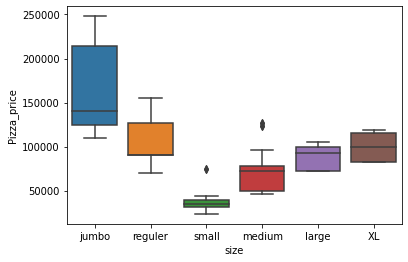

In [38]:
sns.boxplot(x='size', y='Pizza_price', data=pizza)

<AxesSubplot:xlabel='variant', ylabel='Pizza_price'>

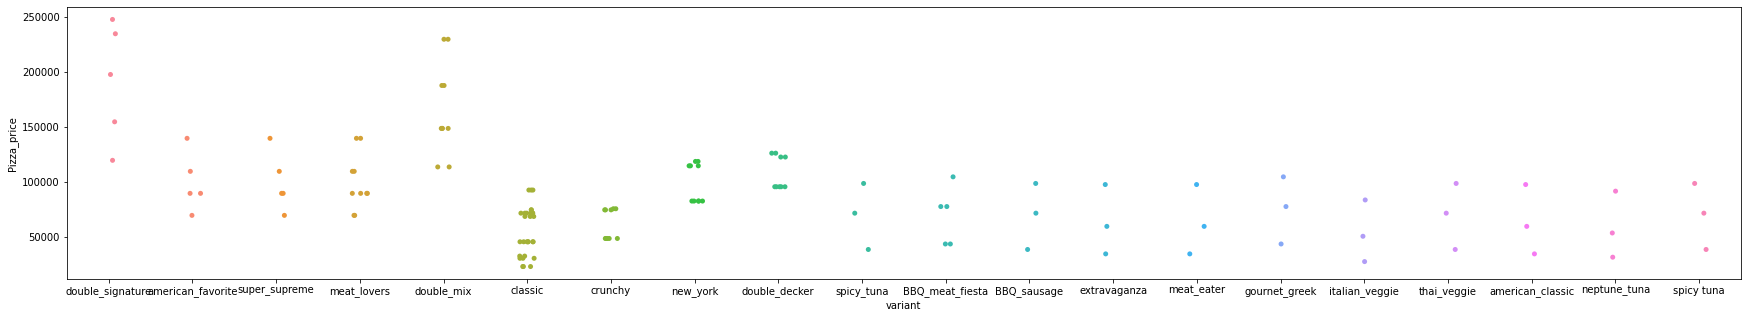

In [42]:
plt.figure(figsize=(30,5))
sns.stripplot(x='variant', y='Pizza_price',data = pizza)

<AxesSubplot:xlabel='size', ylabel='count'>

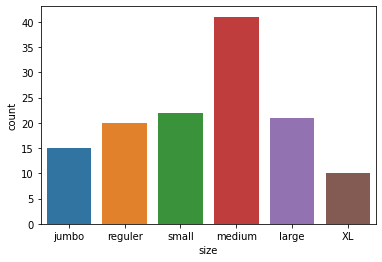

In [43]:
sns.countplot(x='size', data=pizza)

In [44]:
corr_data = one_hot_encoded_data.corr()

<AxesSubplot:>

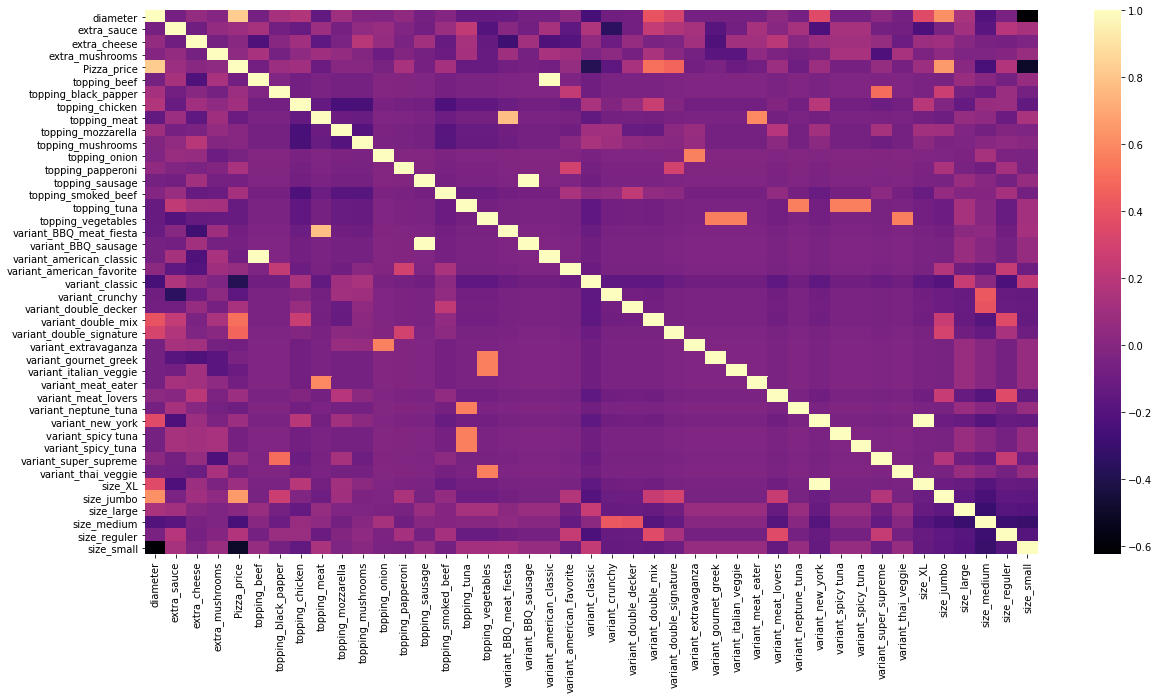

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_data, cmap='magma')

### From the above heatmap, we can see the correlation extent between the columns, which gives us a better understanding of the redundant features that can be eliminated in the future

<AxesSubplot:xlabel='Pizza_price', ylabel='Density'>

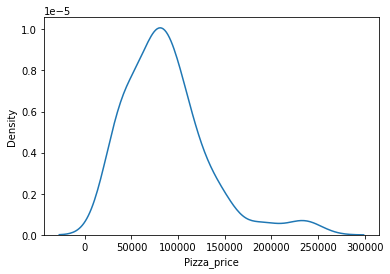

In [95]:
sns.kdeplot(x='Pizza_price', data= pizza)

## Building,training and evaluating the model using Linear Regression
- Extract the target variable(dependent) and the features(independent)
- Build the model
- Fit the model with train data
- Predict values with validation data
- Evaluate the model

In [49]:
## Target Variable 
y = pizza['Pizza_price']
y

0      235000.0
1      198000.0
2      120000.0
3      155000.0
4      248000.0
         ...   
124     39000.0
125     72000.0
126     99000.0
127     44000.0
128     78000.0
Name: Pizza_price, Length: 129, dtype: float64

In [48]:
# Feature variable
X = one_hot_encoded_data.drop(['Pizza_price'], axis=1)
X

,diameter,extra_sauce,extra_cheese,extra_mushrooms,topping_beef,topping_black_papper,topping_chicken,topping_meat,topping_mozzarella,topping_mushrooms,...,variant_spicy tuna,variant_spicy_tuna,variant_super_supreme,variant_thai_veggie,size_XL,size_jumbo,size_large,size_medium,size_reguler,size_small
0,22.0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,20.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,16.0,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,14.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,18.0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,8.5,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
125,12.0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
126,14.0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
127,8.5,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Building our first model using Linear Regression

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [54]:
model_linear = LinearRegression()

In [55]:
model_linear.fit(X_train, y_train)

LinearRegression()

In [56]:
## Predicting the pizza prices
y_pred = model_linear.predict(X_test)

In [76]:
compare_linear = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare_linear.head() 

,Actual,Predicted
55,39000.0,36575.000
40,76000.0,61303.125
19,90000.0,84612.500
31,31000.0,34271.875
114,72000.0,75606.250


In [77]:
## R2 score to evaluate the accuracy of the Linear Regression Model
score = model.score(X_test, y_test)*100
print(f'The R2 score of the Linear Regression model is = {score}')


The R2 score of the Linear Regression model is = 85.65917753148246


### The MAE, MSE and RMSE values for the linear regression model is

In [78]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  9335.537790697674
Mean Squared Error:  285780940.45239824
Root Mean Squared Error:  16905.056653333


d:\python sdk files\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pizza_price', ylabel='Density'>

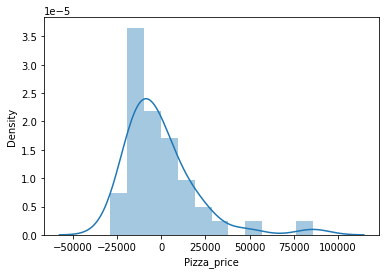

In [79]:
sns.distplot((y_test-model.predict(X_test)))

In [80]:
model.coef_

array([  6907.14241293,   4907.25187129,   1815.07713395,   3914.06497664,
        -6465.37927217,    994.03564949,  -5213.9437497 ,  -3517.89679677,
        -4238.31863761,   3435.09018369,  -2128.14177685,  19825.82515839,
         2190.30696272,   5722.77985534,  -9170.11906653,  -1434.23851   ,
         6405.3537592 ,   2190.30696272,  -6465.37927217, -12399.20558208,
       -15134.06667815,  -9940.89351397,  32598.19545797,  26850.30608372,
        16149.59005148, -11159.33561695,  13629.92956938, -15945.9870125 ,
        -9923.25055597,  -6201.89770947, -13610.06554148,  -5817.93071805,
         4348.99642006,     90.9500549 ,   3452.56490825,    881.81893313,
        -5817.93071805,  20737.6802142 ,   -250.7977994 , -12675.67352561,
         7113.6775377 ,  -9106.95570884])

In [81]:
model.intercept_

-3644.887040973088

### Building a Random Forest Classifier for predicting the pizza price

In [74]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=160)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
compare_randomforest = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
compare_randomforest.head()

,Actual,Predicted
55,39000.0,36575.000
40,76000.0,61303.125
19,90000.0,84612.500
31,31000.0,34271.875
114,72000.0,75606.250


#### Evaluating the Random Forest Model

In [75]:
## R2 score to evaluate the accuracy of the Linear Regression Model
score2 = model_rf.score(X_test, y_test)*100
print(f'The R2 score of the Random Forest model is = {score2}')

The R2 score of the Random Forest model is = 89.91795101099287


## Comparing the Linear Regression Model and Random Forest Classifier

<AxesSubplot:title={'center':'Random Forest'}>

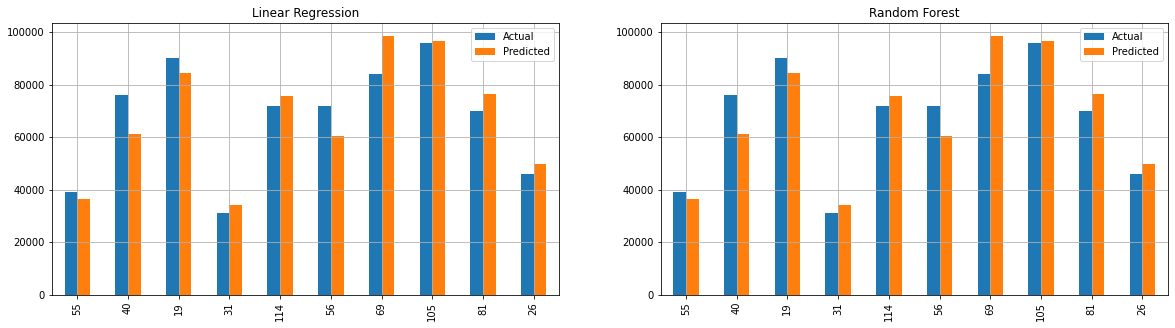

In [83]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))
ax = ax.flatten()
compare_linear.head(10).plot(kind='bar', title='Linear Regression', grid=True, ax=ax[0])
compare_randomforest.head(10).plot(kind='bar', title='Random Forest', grid=True, ax=ax[1])

In [84]:
## Comparing the R2 score of the 2 models

models = pd.DataFrame({'Model Name':['Linear Regression', 'Random Forest'], 'R2 score': [score, score2]})
models

,Model Name,R2 score
0,Linear Regression,85.659178
1,Random Forest,89.917951


<AxesSubplot:title={'center':'Comaprison of R2 Scores of 2 different models'}, xlabel='Model Name', ylabel='R2 score'>

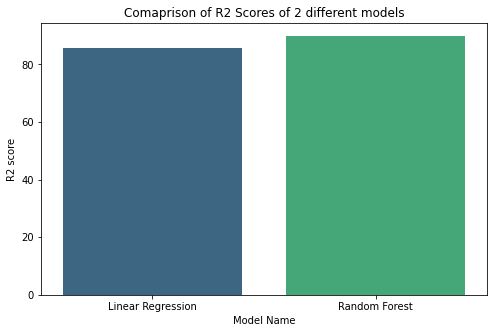

In [97]:
plt.figure(figsize=(8,5))
plt.title('Comaprison of R2 Scores of 2 different models')
sns.barplot(x='Model Name', y='R2 score', data=models,palette='viridis' )

##### Thus we can conclude that Random Forest Classifier(0.89) is more accurate than our Linear Regression Model(0.85)